In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/Robotic Project/Covid 19/COVID-19 Radiography Database.zip'

Archive:  /content/drive/My Drive/Robotic Project/Covid 19/COVID-19 Radiography Database.zip
   creating: COVID-19 Radiography Database/
   creating: COVID-19 Radiography Database/COVID-19/
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  inflatin

In [3]:
!mkdir Train
!mkdir Train/Covid19
!mkdir Train/Normal
!mkdir Train/ViralPneumonia
!mkdir Val
!mkdir Val/Covid19
!mkdir Val/Normal
!mkdir Val/ViralPneumonia

In [4]:
import os

path1="/content/COVID-19 Radiography Database/COVID-19"
path2="/content/COVID-19 Radiography Database/NORMAL"
path3="/content/COVID-19 Radiography Database/Viral Pneumonia"

Covid19_names=os.listdir(path1)
Normal_names=os.listdir(path2)
ViralPneumonia_names=os.listdir(path3)

print(len(Covid19_names))
print(len(Normal_names))
print(len(ViralPneumonia_names))

219
1341
1345


In [5]:
import shutil

train_rate=0.75

train_num_covid19=int(train_rate*len(Covid19_names))
train_num_Normal=int(train_rate*len(Normal_names))
train_num_ViralPneumonia=int(train_rate*len(ViralPneumonia_names))

for i in range(len(Covid19_names)):
  if i<train_num_covid19:
    shutil.move('/content/COVID-19 Radiography Database/COVID-19/'+Covid19_names[i],'/content/Train/Covid19/'+Covid19_names[i])
  else:
    shutil.move('/content/COVID-19 Radiography Database/COVID-19/'+Covid19_names[i],'/content/Val/Covid19/'+Covid19_names[i])

for i in range(len(Normal_names)):
  if i<train_num_Normal:
    shutil.move('/content/COVID-19 Radiography Database/NORMAL/'+Normal_names[i],'/content/Train/Normal/'+Normal_names[i])
  else:
    shutil.move('/content/COVID-19 Radiography Database/NORMAL/'+Normal_names[i],'/content/Val/Normal/'+Normal_names[i])

for i in range(len(ViralPneumonia_names)):
  if i<train_num_ViralPneumonia:
    shutil.move('/content/COVID-19 Radiography Database/Viral Pneumonia/'+ViralPneumonia_names[i],'/content/Train/ViralPneumonia/'+ViralPneumonia_names[i])
  else:
    shutil.move('/content/COVID-19 Radiography Database/Viral Pneumonia/'+ViralPneumonia_names[i],'/content/Val/ViralPneumonia/'+ViralPneumonia_names[i])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0,
        zoom_range=0,
        horizontal_flip=False,
        vertical_flip=False,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_batch=32
val_batch=8

train_generator = datagen.flow_from_directory(
        'Train/',
        target_size=(300,300),
        batch_size=train_batch,
        class_mode='categorical') 

val_generator = datagen.flow_from_directory(
        'Val/',
        target_size=(300,300),
        batch_size=val_batch,
        class_mode='categorical') 

Found 2177 images belonging to 3 classes.
Found 728 images belonging to 3 classes.


In [28]:
train_generator.class_indices

{'Covid19': 0, 'Normal': 1, 'ViralPneumonia': 2}

In [29]:
import tensorflow as tf

model = tf.keras.models.Sequential([  
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 64)       

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

cl2=ModelCheckpoint('/content/drive/My Drive/Robotic Project/Covid 19/backup/weights.{epoch:02d}.hdf5', monitor='val_loss',
                    verbose=0, savefreq='epoch')

loss = []
acc = []
val_loss = []
val_acc = []

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data=val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=25,
      verbose=1,
      callbacks=[cl2])

loss.extend(history.history['loss'])
acc.extend(history.history['acc'])
val_loss.extend(history.history['val_loss'])
val_acc.extend(history.history['val_acc'])

Epoch 1/25
68/68 [==============================] - 109s 2s/step - loss: 0.6521 - acc: 0.7142 - val_loss: 0.4240 - val_acc: 0.8462
Epoch 2/25
68/68 [==============================] - 109s 2s/step - loss: 0.3612 - acc: 0.8793 - val_loss: 0.3927 - val_acc: 0.8709
Epoch 3/25
68/68 [==============================] - 110s 2s/step - loss: 0.2954 - acc: 0.9063 - val_loss: 0.3016 - val_acc: 0.8970
Epoch 4/25
68/68 [==============================] - 109s 2s/step - loss: 0.2911 - acc: 0.8970 - val_loss: 0.2771 - val_acc: 0.9093
Epoch 5/25
68/68 [==============================] - 111s 2s/step - loss: 0.2208 - acc: 0.9235 - val_loss: 0.1999 - val_acc: 0.9299
Epoch 6/25
68/68 [==============================] - 110s 2s/step - loss: 0.2113 - acc: 0.9254 - val_loss: 0.2300 - val_acc: 0.9203
Epoch 7/25
68/68 [==============================] - 110s 2s/step - loss: 0.2179 - acc: 0.9268 - val_loss: 0.1692 - val_acc: 0.9437
Epoch 8/25
68/68 [==============================] - 108s 2s/step - loss: 0.1824 - a

In [33]:
from tensorflow.keras.models import load_model

Model=load_model('/content/drive/My Drive/Robotic Project/Covid 19/backup/weights.25.hdf5')

history = Model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data=val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=25,
      verbose=1,
      callbacks=[cl2])

loss.extend(history.history['loss'])
acc.extend(history.history['acc'])
val_loss.extend(history.history['val_loss'])
val_acc.extend(history.history['val_acc'])

Epoch 1/25
68/68 [==============================] - 114s 2s/step - loss: 0.1009 - acc: 0.9664 - val_loss: 0.1358 - val_acc: 0.9547
Epoch 2/25
68/68 [==============================] - 115s 2s/step - loss: 0.0644 - acc: 0.9804 - val_loss: 0.1556 - val_acc: 0.9492
Epoch 3/25
68/68 [==============================] - 112s 2s/step - loss: 0.0839 - acc: 0.9730 - val_loss: 0.1466 - val_acc: 0.9547
Epoch 4/25
68/68 [==============================] - 112s 2s/step - loss: 0.0934 - acc: 0.9674 - val_loss: 0.1414 - val_acc: 0.9478
Epoch 5/25
68/68 [==============================] - 113s 2s/step - loss: 0.0715 - acc: 0.9744 - val_loss: 0.1102 - val_acc: 0.9533
Epoch 6/25
68/68 [==============================] - 114s 2s/step - loss: 0.0457 - acc: 0.9851 - val_loss: 0.1585 - val_acc: 0.9560
Epoch 7/25
68/68 [==============================] - 114s 2s/step - loss: 0.0555 - acc: 0.9818 - val_loss: 0.1519 - val_acc: 0.9588
Epoch 8/25
68/68 [==============================] - 111s 2s/step - loss: 0.0798 - a

In [34]:
Model=load_model('/content/drive/My Drive/Robotic Project/Covid 19/backup/weights.25.hdf5')

In [35]:
import cv2
import numpy as np

test_images_names=['/content/Val/Covid19/COVID-19(195).png', '/content/Val/Normal/NORMAL (707).png', 
                   '/content/Val/ViralPneumonia/Viral Pneumonia (868).png']

for i in (test_images_names):
  img=cv2.imread(i)
  img=cv2.resize(img,(300,300))
  img=img/255
  img=np.expand_dims(img, axis=0)
  score=Model.predict(img)
  print(score*100)

[[9.2307739e+01 7.6877789e+00 4.4832835e-03]]
[[8.3645936e-03 9.9991631e+01 3.7427333e-07]]
[[6.6761831e-03 6.0832772e-02 9.9932495e+01]]


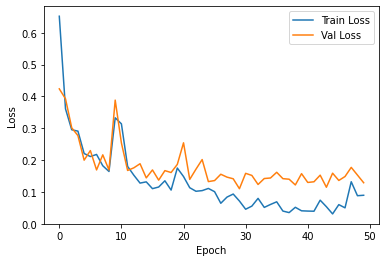

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(loss)
plt.plot(val_loss)

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend(['Train Loss','Val Loss'])

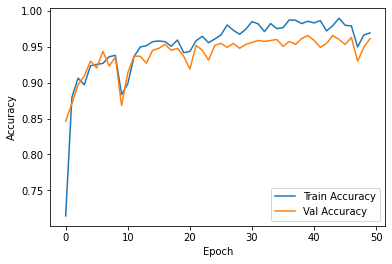

In [37]:
plt.plot(acc)
plt.plot(val_acc)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend(['Train Accuracy','Val Accuracy'])